In [ ]:
!pip install joypy

In [ ]:
# Bibliotecas
import joypy
import tifffile as tif
import numpy as np
import pandas as pd
from matplotlib import cm

In [ ]:
# Leitura da imagem
img = tif.imread('/content/drive/MyDrive/Live PDI Python/ndviMODIS.tif')

In [ ]:
img.shape

(789, 696, 552)

In [ ]:
# Extração do valor médio por cena
medias = [np.mean(img[:,:,i]) for i in range(img.shape[2])]

In [ ]:
# Conversão para um pandas dataframe
df = pd.DataFrame(medias, columns=['ndvi'])

In [ ]:
# Criação de nova coluna com o ano
df['ano'] = ""
anos_modis = list(range(0,551, 45))

for i in anos_modis:
  df['ano'].iloc[i:i+45] = anos_modis.index(i)+1


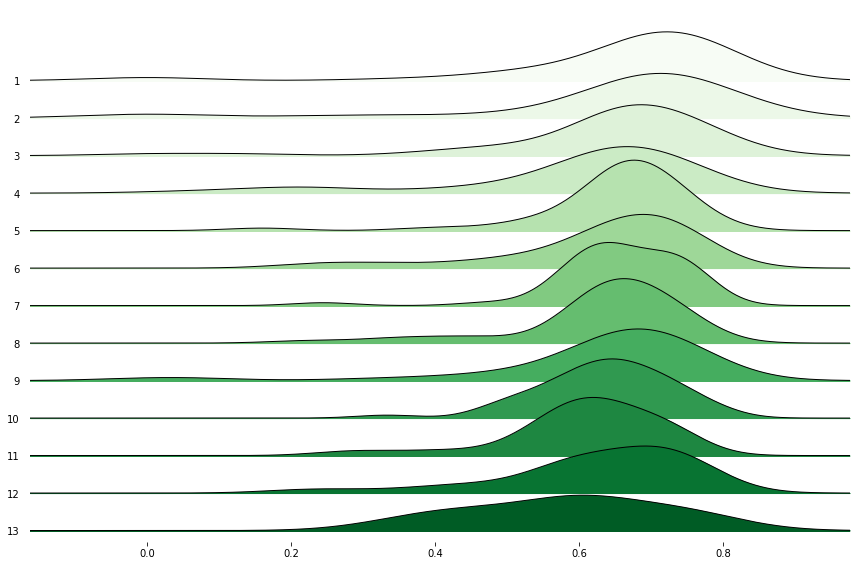

In [ ]:
# Criação do joyplot
fig, axes = joypy.joyplot(df, by="ano", column="ndvi", linewidth=1, 
                          legend=False, figsize=(12,8), colormap=cm.Greens)

In [ ]:
# Manipulando valores infinitos
from numpy import inf
df['ndvi'][df.ndvi == -inf] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


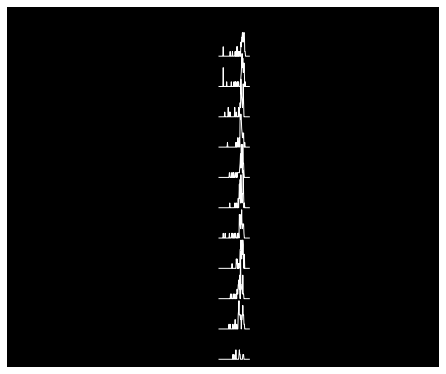

In [ ]:
import matplotlib.pyplot as plt

fig, axes = joypy.joyplot(df,by="ano", column="ndvi", ylabels=False, xlabels=False, 
                          grid=False, fill=False, background='k', linecolor="w", linewidth=1,
                          legend=False, overlap=0.5, figsize=(6,5),kind="counts", bins=80)

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
for a in axes[:-1]:
    a.set_xlim([-8,8])   